##  NN Implementation (II)

    Create NN using Keras

In [9]:
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
keras.__version__

'2.6.0'

## 1. Load the MNIST handwritten digits dataset

    -- MNIST handwritten, 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images
    -- dataset description: http://yann.lecun.com/exdb/mnist/
    
<img src="mnist_hw.jpeg" alt="drawing" width="400"/>

In [82]:
(x_train_0, y_train), (x_test_0, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train_0, [x_train_0.shape[0], x_train_0.shape[1] * x_train_0.shape[2]])
x_test = np.reshape(x_test_0, [x_test_0.shape[0], x_test_0.shape[1] * x_test_0.shape[2]])

# data normalization
x_train_1 = x_train/255
x_test_1 = x_test/255

print('Training set 0: {} and Training Targets: {}'.format(x_train_0.shape, y_train.shape))
print('Training set: {} and Training Targets: {}'.format(x_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(x_test.shape, y_test.shape))

Training set 0: (60000, 28, 28) and Training Targets: (60000,)
Training set: (60000, 784) and Training Targets: (60000,)
Test set: (10000, 784) and test targets: (10000,)


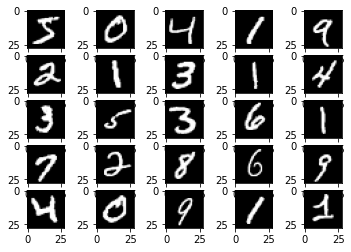

Image labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [83]:
#show first 25 images
nImg = 5
for i in range(nImg*nImg):
    plt.subplot(nImg, nImg, i+1)
    plt.imshow(x_train_0[i], cmap = 'Greys_r')
plt.show()

print('Image labels:', y_train[:25])

## 2. Handwritten digits classification using our linear regression and GD

In [51]:
##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

In [62]:
# 2. training step
w_star, loss_hist, w_hist = GD(x_train_1, y_train, lr = 0.0001, delta = 0.01, max_iter = 50)

0 loss: 73833292.23927093
1 loss: 44036379.04387464
2 loss: 26532962.886830103
3 loss: 16242435.343113203
4 loss: 10184258.688168459
5 loss: 6609883.188201131
6 loss: 4493494.911787559
7 loss: 3233267.894450435
8 loss: 2476106.5885060076
9 loss: 2014832.6628768668
10 loss: 1727870.5637246969
11 loss: 1543864.5544082546
12 loss: 1420921.5640173003
13 loss: 1334434.1252685855
14 loss: 1269936.740645471
15 loss: 1218915.063182871
16 loss: 1176347.3204671764
17 loss: 1139261.9455922002
18 loss: 1105891.3593490021
19 loss: 1075175.4819673868
20 loss: 1046470.4134140238
21 loss: 1019377.4768172856
22 loss: 993642.874603638
23 loss: 969098.7716132012
24 loss: 945628.6835357309
25 loss: 923147.1262839303
26 loss: 901587.6337410116
27 loss: 880895.686949688
28 loss: 861024.526654105
29 loss: 841932.6593293297
30 loss: 823582.3585737359
31 loss: 805938.7522196776
32 loss: 788969.2547567161
33 loss: 772643.2039487101
34 loss: 756931.6187762656
35 loss: 741807.0300121937
36 loss: 727243.3547907291

In [1]:
# 3. model evaluation using error rate (# error samples/# of total samples)
y_train_pred = np.round(predict(x_train_1, w_star))


# error rate

y_test_pred = np.round(predict(x_test_1, w_star))


NameError: name 'np' is not defined

## 3. Using NNs for handwritten digits classification

#### Generate the one-hot vector for the training targets

In [87]:
y_train_onehot = keras.utils.to_categorical(y_train)
print(y_train[:5])
y_train_onehot[:5]

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### Create an NN using keras

In [2]:
# Create a feedforward NN: 1 hidden layers with 50 hidden unites with sigm activation,
# and one output layer with 10 units for the 10 classes
model = keras.models.Sequential()


NameError: name 'keras' is not defined

#### Train the NN

In [113]:
#predict the class labels
y_train_pred_onehot = model.predict(x_train_1)


y_test_pred_onehot= model.predict(x_test)

[5 0 4 1 9 2 1 3 1 4] 
 [5 0 4 1 9 2 1 3 1 4]
training error rate: 8.366666666666667% 
test error rate: 8.44% 
